<a href="https://colab.research.google.com/github/jitendra19/stock-market-prediction/blob/main/BitsPilaniDessertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 7.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
# from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    # data = DataReader.get_data_yahoo(stock, start=start, end=end)
    # globals()[stock] = DataReader(stock, 'yahoo', start='2019-09-10', end='2019-10-09')
    ticker = yf.Ticker(stock)
    globals()[stock] = ticker.history(period="5y", auto_adjust=True)
    # print(stock)    

In [4]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)



,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2022-01-07,3276.780029,3304.870117,3240.620117,3251.080078,2329300,0.0,0.0,AMAZON
2022-01-10,3211.709961,3233.229980,3126.090088,3229.719971,4389900,0.0,0.0,AMAZON
2022-01-11,3230.000000,3327.000000,3214.030029,3307.239990,3140300,0.0,0.0,AMAZON
2022-01-12,3331.500000,3337.560059,3288.340088,3304.139893,2501500,0.0,0.0,AMAZON
2022-01-13,3305.010010,3324.429932,3221.820068,3224.280029,2609400,0.0,0.0,AMAZON
2022-01-14,3203.000000,3245.000000,3196.010010,3242.760010,2295800,0.0,0.0,AMAZON
2022-01-18,3182.100098,3194.689941,3153.290039,3178.350098,3364600,0.0,0.0,AMAZON
2022-01-19,3175.239990,3185.000000,3125.000000,3125.979980,2662100,0.0,0.0,AMAZON
2022-01-20,3135.320068,3160.000000,3027.020020,3033.350098,3598700,0.0,0.0,AMAZON


In [5]:
df.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name
Date,,,,,,,,
2017-01-23,28.238452,28.429061,28.184328,28.257278,88200800,0.0,0.0,APPLE
2017-01-24,28.132560,28.261985,28.120793,28.231394,92844000,0.0,0.0,APPLE
2017-01-25,28.337289,28.732627,28.304344,28.680857,129510400,0.0,0.0,APPLE
2017-01-26,28.631437,28.812635,28.614965,28.694975,105350400,0.0,0.0,APPLE
2017-01-27,28.742038,28.791455,28.614965,28.697327,82251600,0.0,0.0,APPLE
2017-01-30,28.457305,28.622028,28.393769,28.622028,121510000,0.0,0.0,APPLE
2017-01-31,28.509072,28.565548,28.384352,28.556135,196804000,0.0,0.0,APPLE
2017-02-01,29.892751,30.706961,29.888046,30.297503,447940000,0.0,0.0,APPLE
2017-02-02,30.116320,30.448120,30.069254,30.245745,134841600,0.0,0.0,APPLE


In [6]:
AAPL.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03,1260.000000,1260.000000
mean,75.063249,75.888368,74.277318,75.115283,1.207908e+08,0.002978,0.003175
std,42.152452,42.661045,41.643392,42.159224,5.618982e+07,0.023632,0.112687
min,28.132560,28.261985,28.120793,28.231394,4.100000e+07,0.000000,0.000000
25%,41.592755,41.855582,41.313063,41.596220,8.360210e+07,0.000000,0.000000
50%,52.972516,53.706530,52.422306,53.087391,1.056046e+08,0.000000,0.000000
75%,117.119679,118.522825,115.440828,116.596914,1.409066e+08,0.000000,0.000000
max,182.630005,182.940002,179.119995,182.009995,4.479400e+08,0.220000,4.000000


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-01-23 to 2022-01-21
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1260 non-null   float64
 1   High          1260 non-null   float64
 2   Low           1260 non-null   float64
 3   Close         1260 non-null   float64
 4   Volume        1260 non-null   int64  
 5   Dividends     1260 non-null   float64
 6   Stock Splits  1260 non-null   float64
 7   company_name  1260 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 88.6+ KB


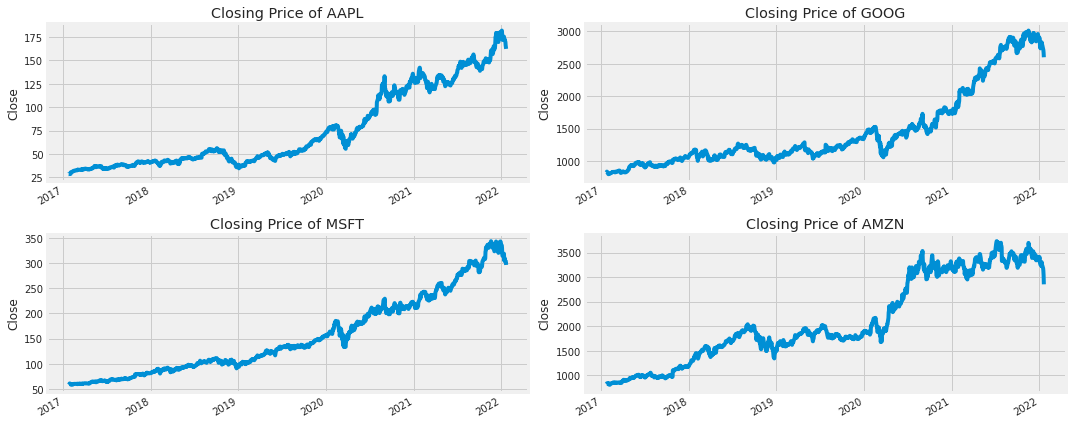

In [8]:
# Let's see a historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

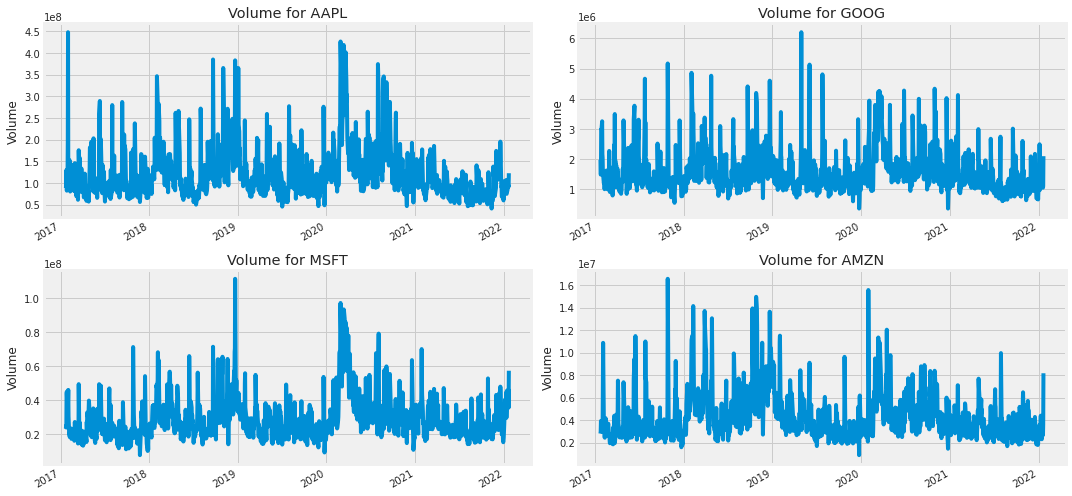

In [9]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# What was the moving average of the various stocks?


In [10]:
ma_day = [10, 20, 50, 100, 200]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'company_name', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days',
       'MA for 100 days', 'MA for 200 days'],
      dtype='object')


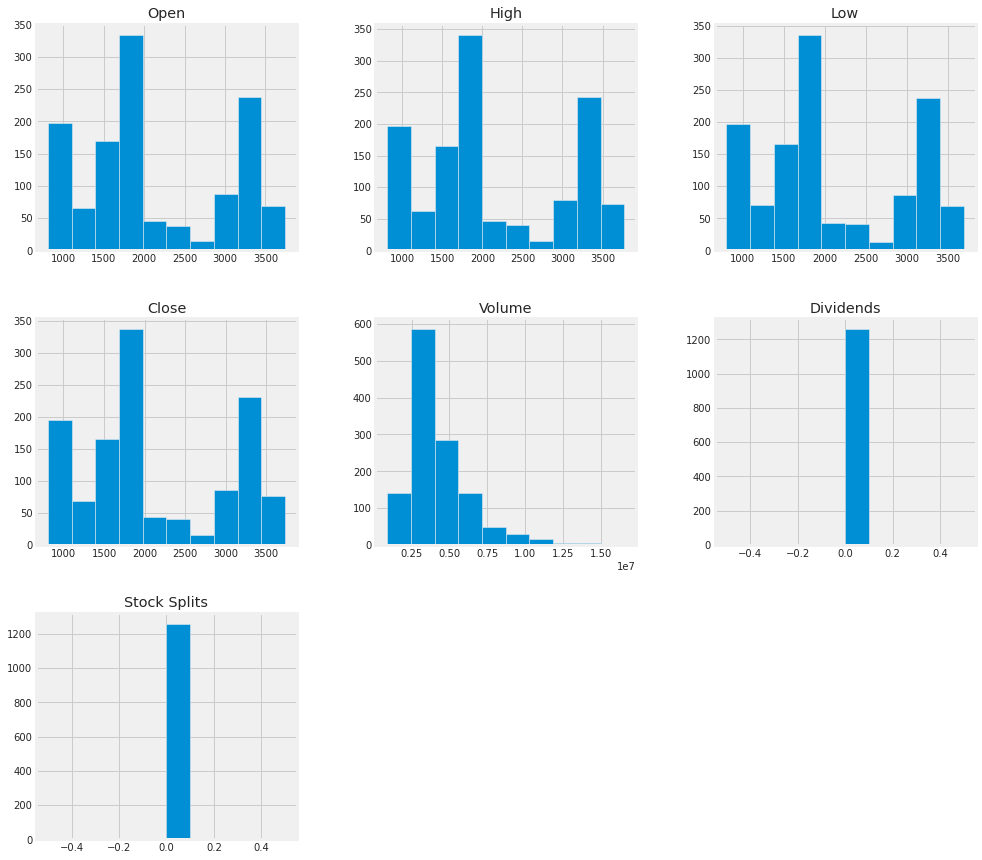

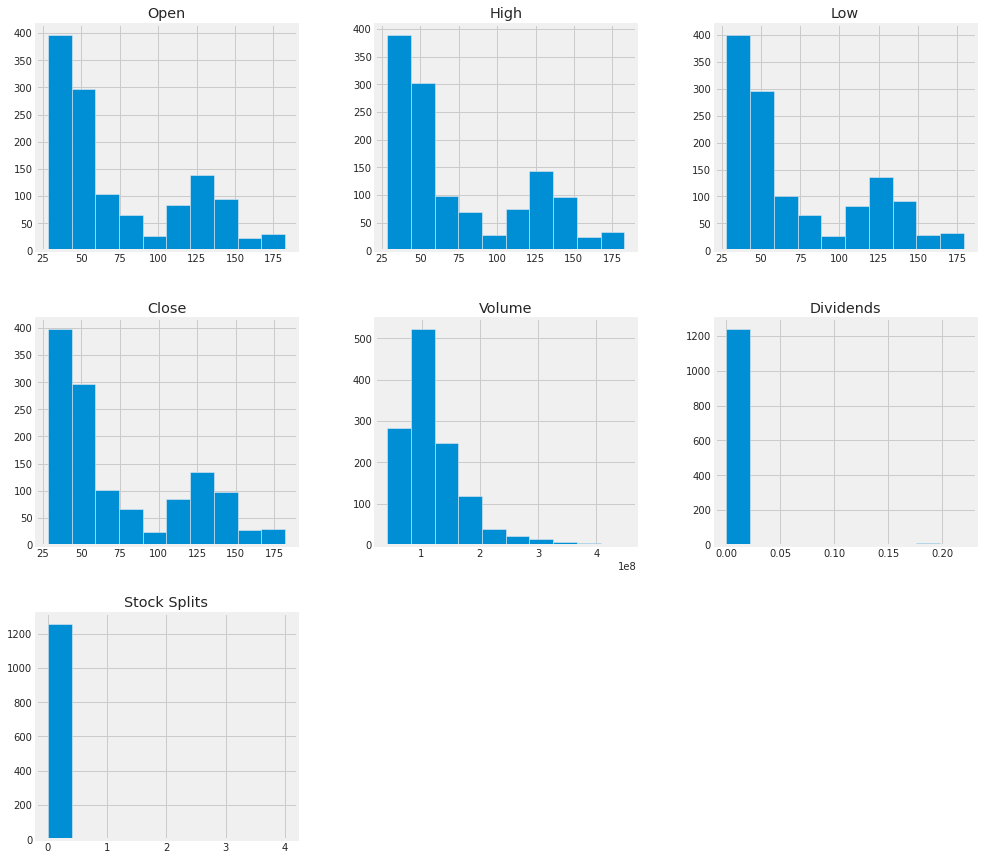

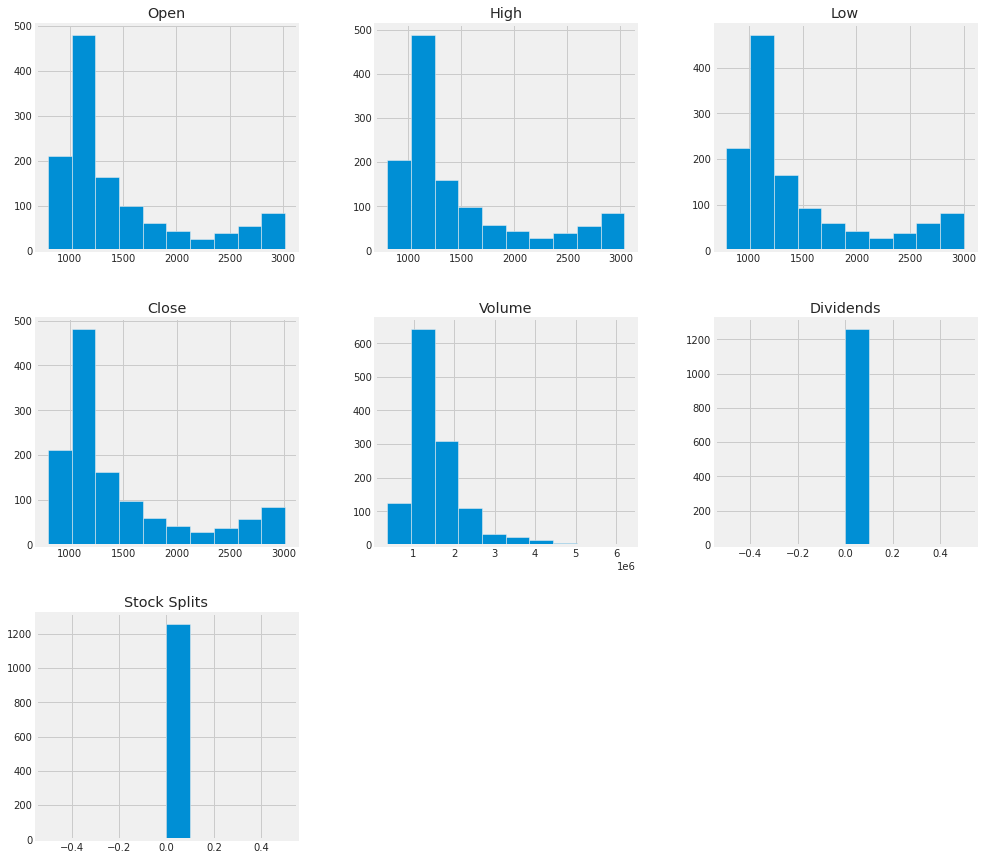

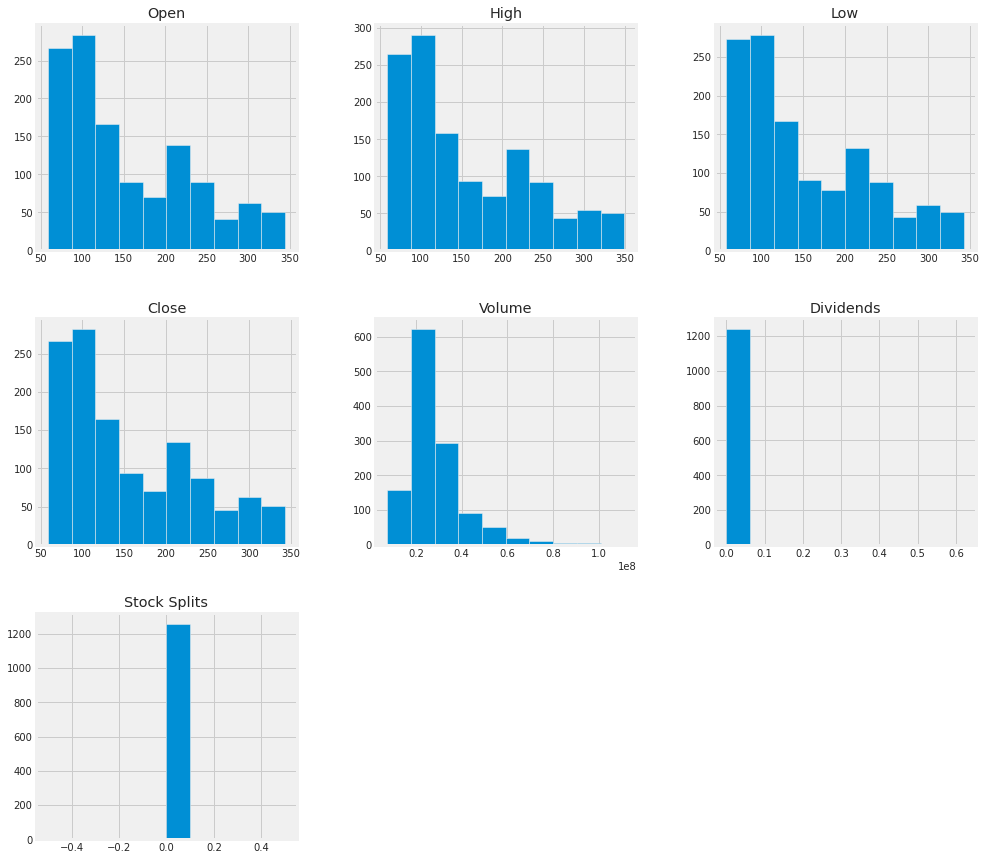

In [11]:
df.groupby("company_name").hist(figsize=(15, 15));

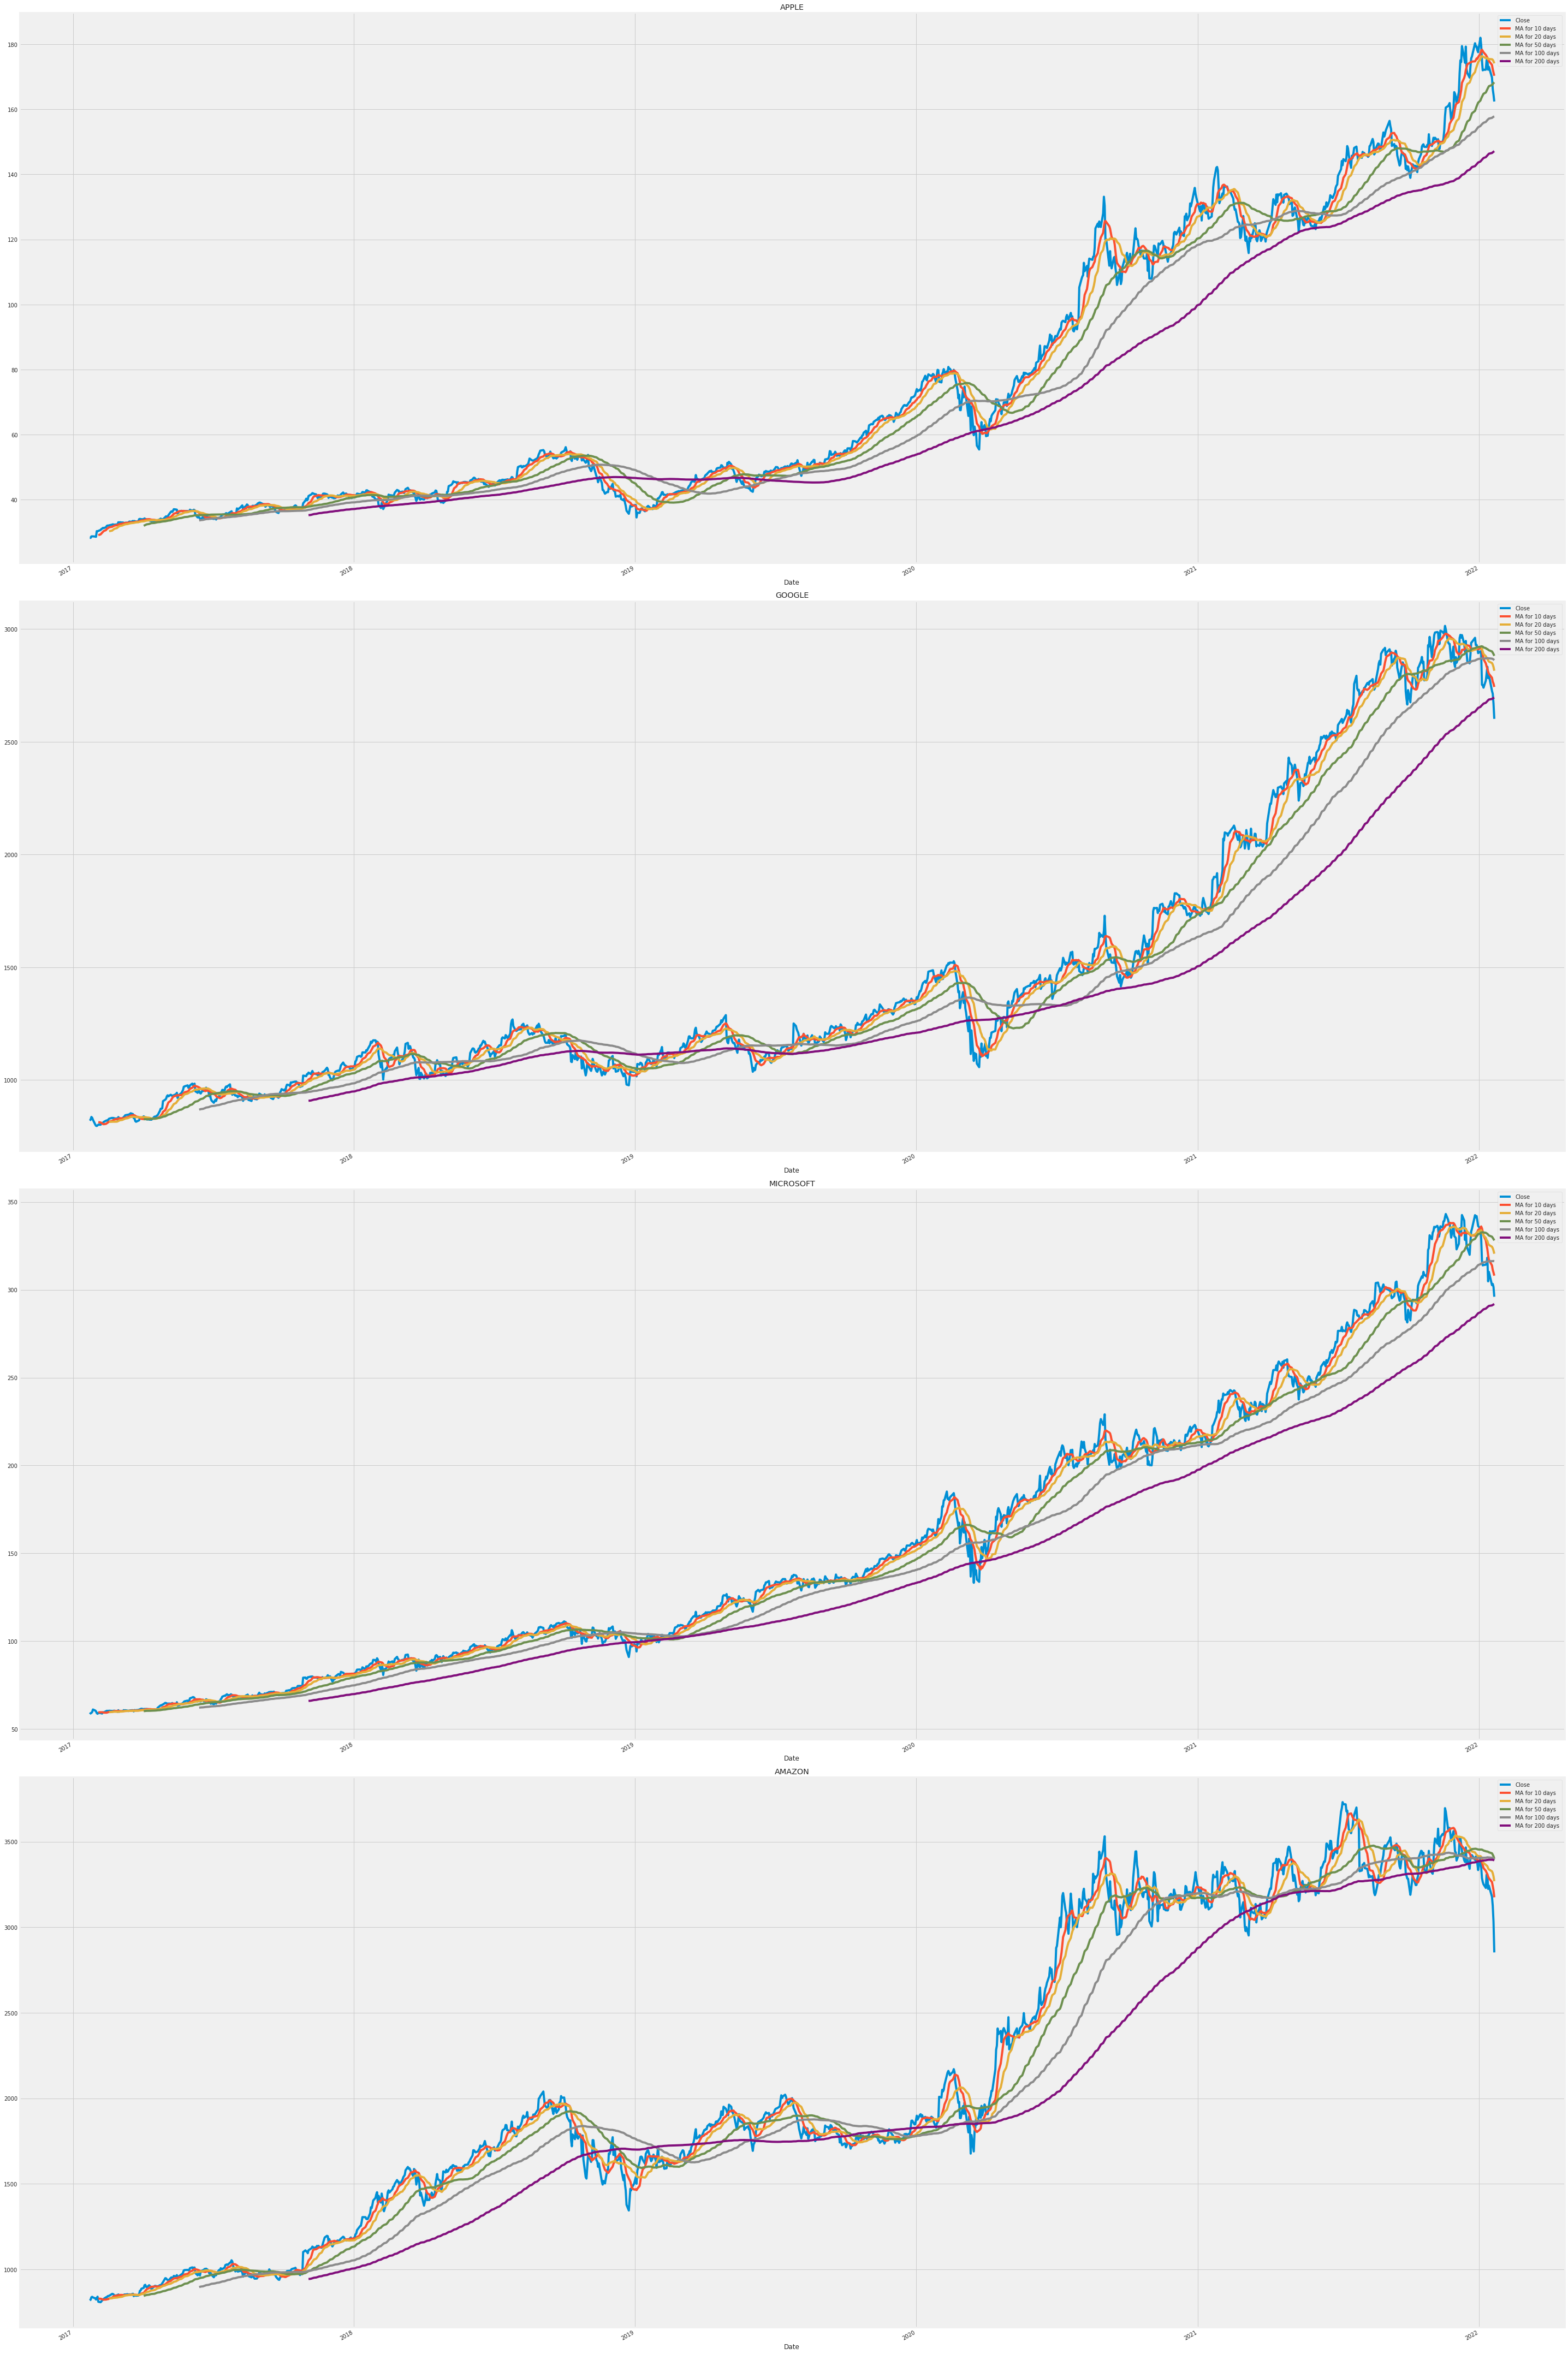

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=1)
fig.set_figheight(60)
fig.set_figwidth(40)
args = ['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days', 'MA for 200 days']

AAPL[args].plot(ax=axes[0])
axes[0].set_title('APPLE')

GOOG[args].plot(ax=axes[1])
axes[1].set_title('GOOGLE')

MSFT[args].plot(ax=axes[2])
axes[2].set_title('MICROSOFT')

AMZN[args].plot(ax=axes[3])
axes[3].set_title('AMAZON')

fig.tight_layout()

# What was the daily return of the stock on average?

In [13]:
# We'll use pct_change to find the percent change for each day
# Percentage change between the current and a prior element.
# Computes the percentage change from the immediately previous row by
# default. This is useful in comparing the percentage of change in a time
# series of elements.
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

AAPL.head(12)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,company_name,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,MA for 200 days,Daily Return
Date,,,,,,,,,,,,,,
2017-01-23,28.238452,28.429061,28.184328,28.257278,88200800,0.0,0.0,APPLE,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-24,28.132560,28.261985,28.120793,28.231394,92844000,0.0,0.0,APPLE,NaN,NaN,NaN,NaN,NaN,-0.000916
2017-01-25,28.337289,28.732627,28.304344,28.680857,129510400,0.0,0.0,APPLE,NaN,NaN,NaN,NaN,NaN,0.015921
2017-01-26,28.631437,28.812635,28.614965,28.694975,105350400,0.0,0.0,APPLE,NaN,NaN,NaN,NaN,NaN,0.000492
2017-01-27,28.742038,28.791455,28.614965,28.697327,82251600,0.0,0.0,APPLE,NaN,NaN,NaN,NaN,NaN,0.000082
2017-01-30,28.457305,28.622028,28.393769,28.622028,121510000,0.0,0.0,APPLE,NaN,NaN,NaN,NaN,NaN,-0.002624
2017-01-31,28.509072,28.565548,28.384352,28.556135,196804000,0.0,0.0,APPLE,NaN,NaN,NaN,NaN,NaN,-0.002302
2017-02-01,29.892751,30.706961,29.888046,30.297503,447940000,0.0,0.0,APPLE,NaN,NaN,NaN,NaN,NaN,0.060980
2017-02-02,30.116320,30.448120,30.069254,30.245745,134841600,0.0,0.0,APPLE,NaN,NaN,NaN,NaN,NaN,-0.001708


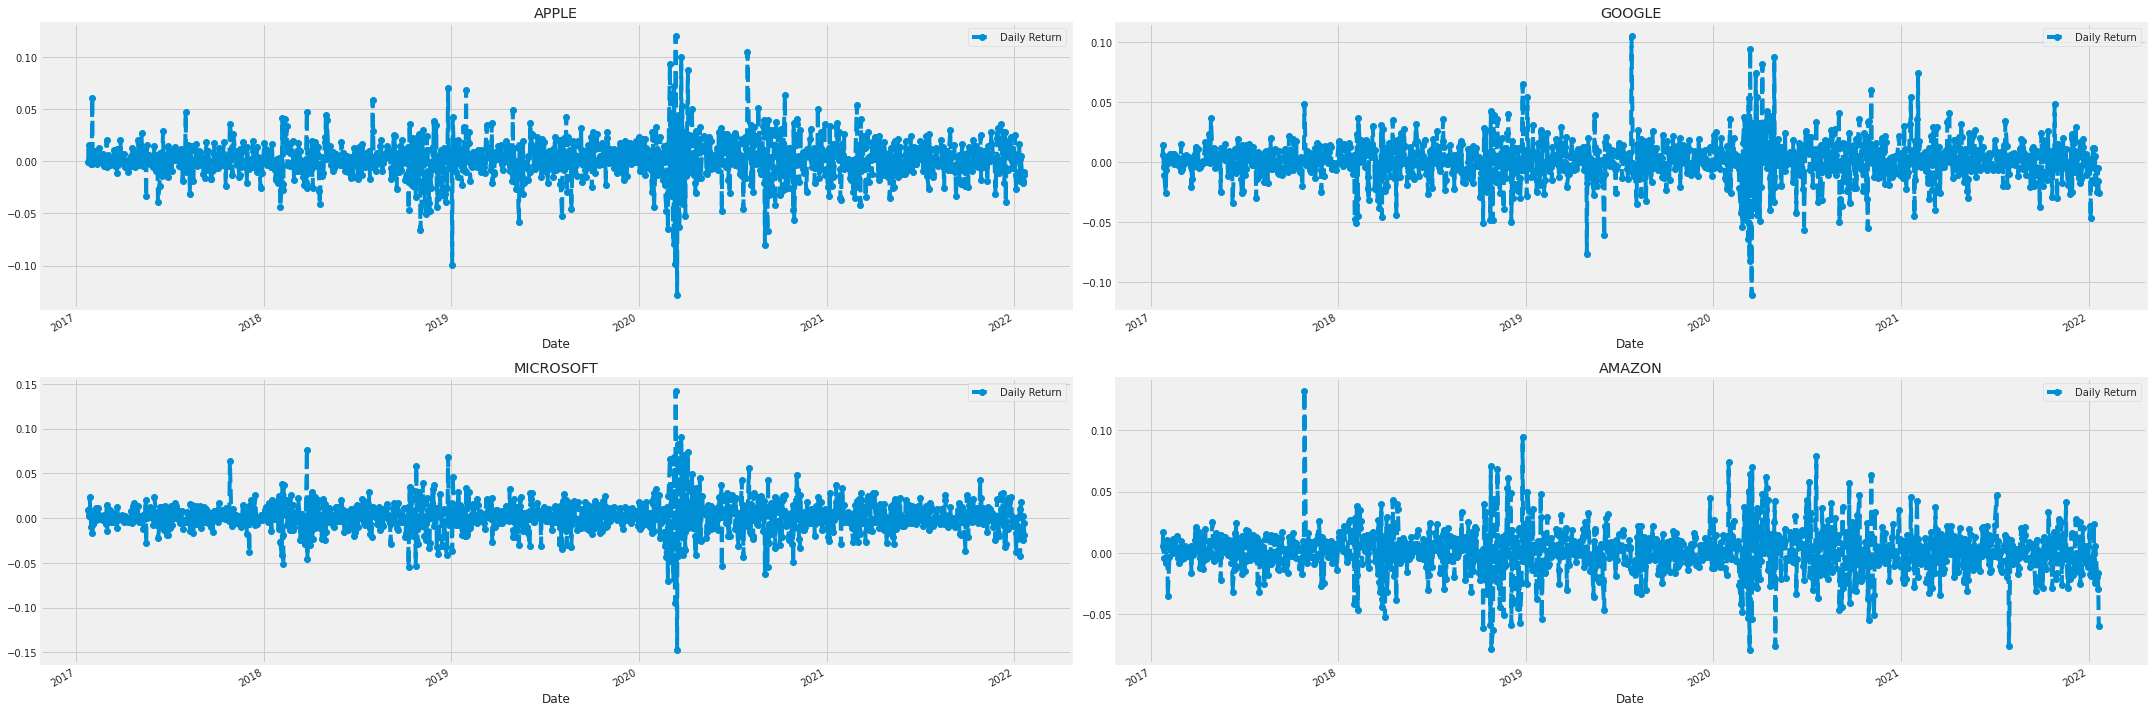

In [14]:
# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(30)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

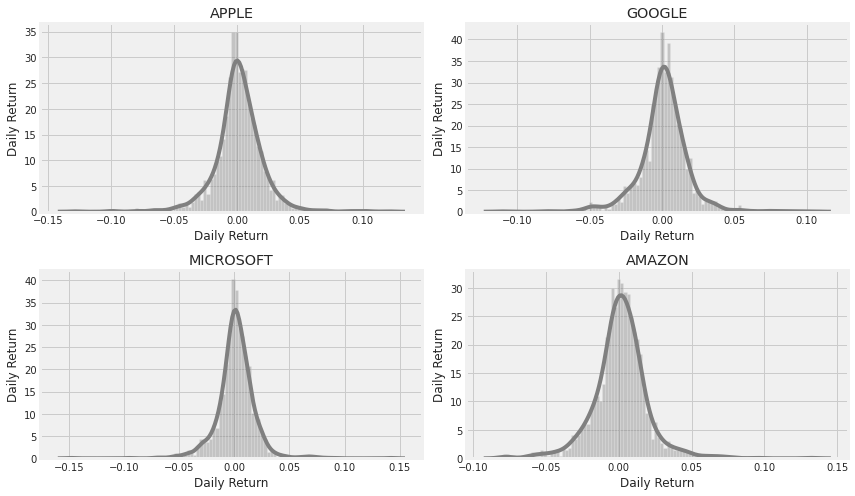

In [15]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='grey')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
# AAPL['Daily Return'].hist()
plt.tight_layout()

# What was the correlation between different stocks closing prices?


In [16]:
# Grab all the closing prices for the tech stock list into one DataFrame
# closing_df = DataReader(tech_list, 'yahoo', start, end)['Close']

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# for stock in tech_list:   
#     # ticker = yf.Ticker(stock)
#     # globals()[stock] = ticker.history(period="max", auto_adjust=True)
#     newName = stock + 'Close';
#     hey = globals()[stock].rename({'Close': 'stock'})
#     print(hey.head())

# horizontal_stack = pd.concat([closing_df['AAPL'], closing_df['GOOG']], axis=1)
# horizontal_stack = pd.concat([AAPL['Close'], GOOG['Close']], axis=1)

horizontal_stack = pd.concat([AAPL, GOOG, MSFT, AMZN], axis=1)['Close']

# Let's take a quick look
horizontal_stack = horizontal_stack.set_axis(tech_list, axis=1, inplace=False)
horizontal_stack.tail() 

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-01-14,173.070007,2795.729980,310.200012,3242.760010
2022-01-18,169.800003,2725.810059,302.649994,3178.350098
2022-01-19,166.229996,2713.040039,303.329987,3125.979980
2022-01-20,164.509995,2670.129883,301.600006,3033.350098
2022-01-21,162.410004,2601.840088,296.029999,2852.860107


In [17]:
tech_rets = horizontal_stack.pct_change()
tech_rets.tail()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2022-01-14,0.005111,0.004711,0.017717,0.005732
2022-01-18,-0.018894,-0.025010,-0.024339,-0.019863
2022-01-19,-0.021025,-0.004685,0.002247,-0.016477
2022-01-20,-0.010347,-0.015816,-0.005703,-0.029632
2022-01-21,-0.012765,-0.025575,-0.018468,-0.059502


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


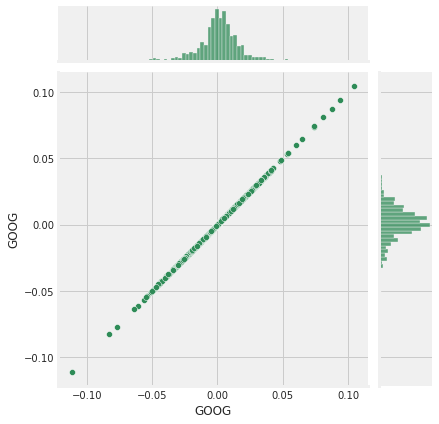

In [18]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


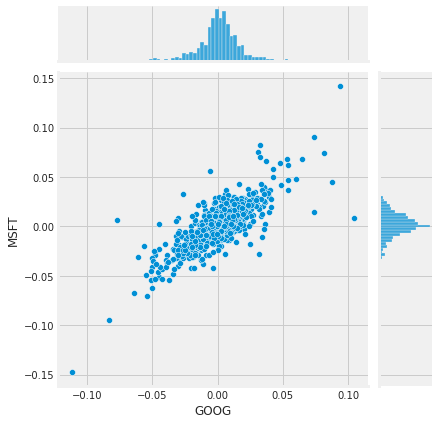

In [19]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter')

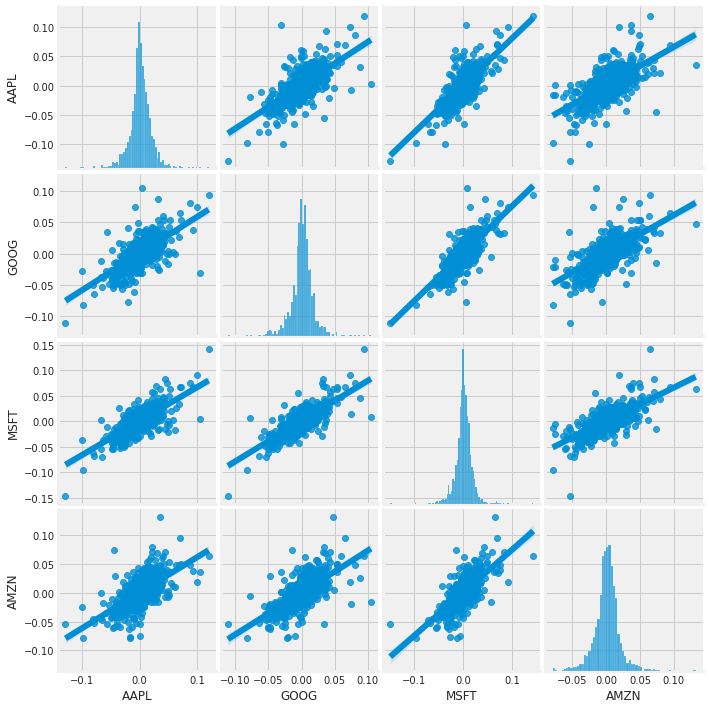

In [20]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

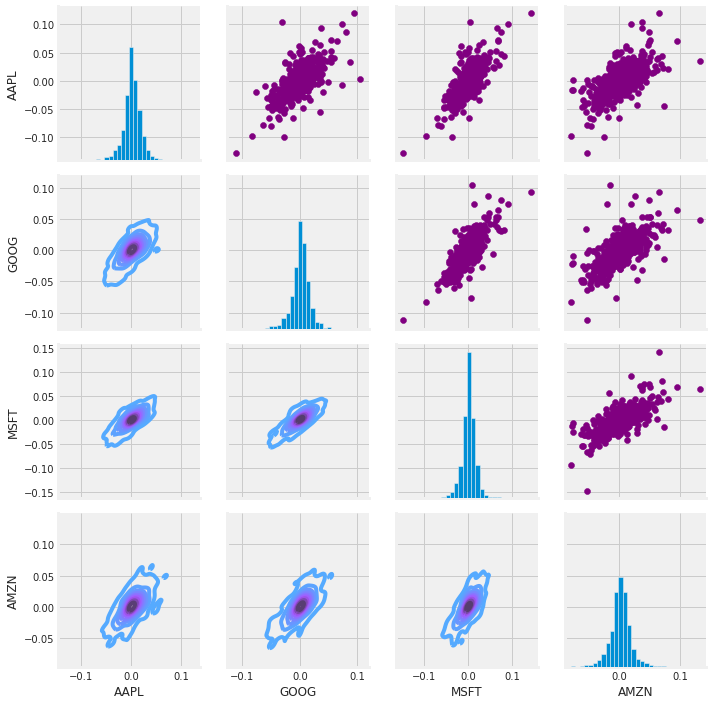

In [21]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, including the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

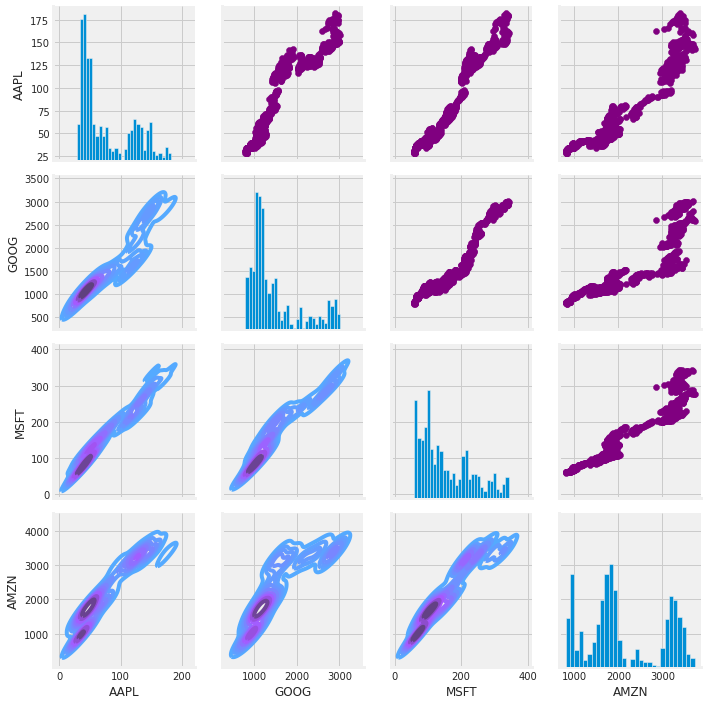

In [22]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(horizontal_stack)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

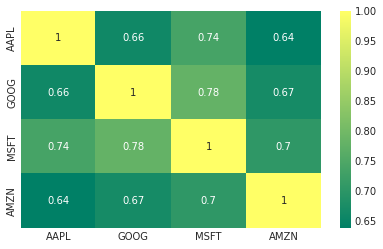

In [23]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

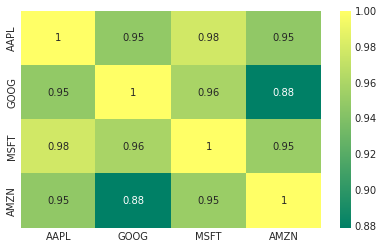

In [24]:
sns.heatmap(horizontal_stack.corr(), annot=True, cmap='summer')

# How much value do we put at risk by investing in a particular stock?

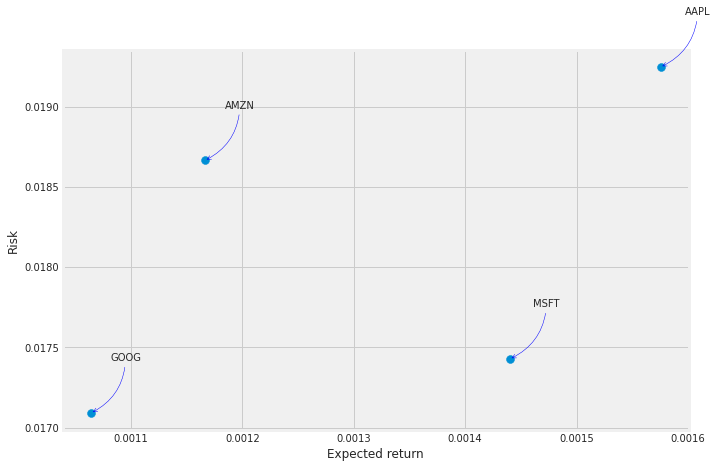

In [25]:
# There are many ways we can quantify risk, one of the most basic ways using the information 
# we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='->', color='blue', connectionstyle='arc3,rad=-0.3'))

#. Predicting the closing price stock price of APPLE inc:

In [26]:
# Get the stock quote

# df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
ticker = yf.Ticker('AAPL')
df = ticker.history(period="1y", auto_adjust=True)

# Show teh data
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-01-22,135.445012,138.993146,134.192737,138.217926,114459400,0.0,0
2021-01-25,142.193432,144.201045,135.703427,142.044342,157611700,0.0,0
2021-01-26,142.720159,143.415867,140.503811,142.282852,98390600,0.0,0
2021-01-27,142.551192,143.415871,139.549706,141.189590,140843800,0.0,0
2021-01-28,138.665181,141.120048,135.862451,136.250061,142621100,0.0,0
...,...,...,...,...,...,...,...
2022-01-14,171.339996,173.779999,171.089996,173.070007,80355000,0.0,0
2022-01-18,171.509995,172.539993,169.410004,169.800003,90956700,0.0,0
2022-01-19,170.000000,171.080002,165.940002,166.229996,94815000,0.0,0


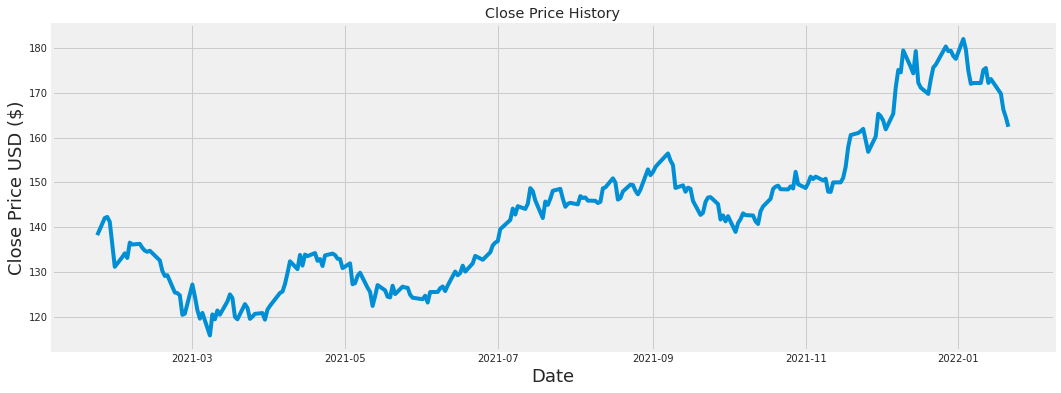

In [27]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [28]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

241

In [29]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.33838969],
       [0.39619916],
       [0.39980257],
       [0.38328558],
       [0.3086592 ],
       [0.23163001],
       [0.26436361],
       [0.27712689],
       [0.2613605 ],
       [0.31316352],
       [0.30677232],
       [0.30902828],
       [0.29549388],
       [0.28617057],
       [0.28226079],
       [0.28586973],
       [0.25308725],
       [0.2177482 ],
       [0.20075563],
       [0.20316144],
       [0.14496502],
       [0.14285971],
       [0.13519045],
       [0.06962527],
       [0.07368559],
       [0.17188282],
       [0.13173181],
       [0.0857159 ],
       [0.05669267],
       [0.07609163],
       [0.        ],
       [0.07112913],
       [0.05443717],
       [0.08421215],
       [0.07022672],
       [0.11473889],
       [0.13849878],
       [0.12631817],
       [0.06270788],
       [0.05458747],
       [0.10571631],
       [0.09293401],
       [0.05609122],
       [0.06361006],
       [0.0729336 ],
       [0.07564048],
       [0.05323403],
       [0.087

In [30]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.33838969, 0.39619916, 0.39980257, 0.38328558, 0.3086592 ,
       0.23163001, 0.26436361, 0.27712689, 0.2613605 , 0.31316352,
       0.30677232, 0.30902828, 0.29549388, 0.28617057, 0.28226079,
       0.28586973, 0.25308725, 0.2177482 , 0.20075563, 0.20316144,
       0.14496502, 0.14285971, 0.13519045, 0.06962527, 0.07368559,
       0.17188282, 0.13173181, 0.0857159 , 0.05669267, 0.07609163,
       0.        , 0.07112913, 0.05443717, 0.08421215, 0.07022672,
       0.11473889, 0.13849878, 0.12631817, 0.06270788, 0.05458747,
       0.10571631, 0.09293401, 0.05609122, 0.06361006, 0.0729336 ,
       0.07564048, 0.05323403, 0.08706934, 0.0998514 , 0.14346139,
       0.14812305, 0.1735371 , 0.21053009, 0.25022984, 0.22376365,
       0.27173434, 0.2356433 , 0.27278694, 0.26767425, 0.27789986])]
[0.251884349708011]

[array([0.33838969, 0.39619916, 0.39980257, 0.38328558, 0.3086592 ,
       0.23163001, 0.26436361, 0.27712689, 0.2613605 , 0.31316352,
       0.30677232, 0.30902828, 0.2954

In [31]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

181/181 [==============================] - 9s 33ms/step - loss: 0.0148


In [32]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

14.53432067848957

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


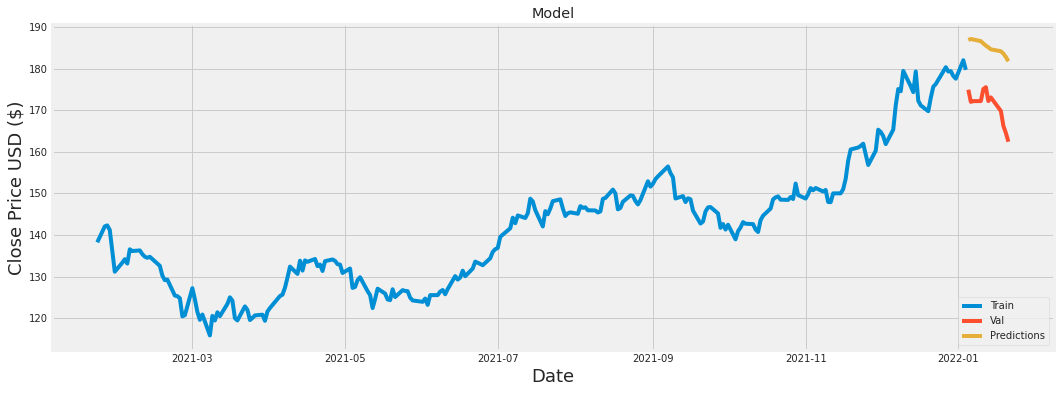

In [33]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

In [50]:
from prettytable import PrettyTable

myTable = PrettyTable(["closing price", "Prediction"]) 

# valid['Close']
# valid['Predictions']

for i in range(10):
    # print(forecast[i][0], ' ---> ',svm_prediction[i]) valid['Predictions']
    # print(y_test[i][0])
    # print(y_test[i][0])
    myTable.add_row([y_test[i][0], y_test[i][0]])



print(myTable)

+--------------------+--------------------+
|   closing price    |     Prediction     |
+--------------------+--------------------+
| 174.9199981689453  | 174.9199981689453  |
|       172.0        |       172.0        |
| 172.1699981689453  | 172.1699981689453  |
| 172.19000244140625 | 172.19000244140625 |
| 175.0800018310547  | 175.0800018310547  |
| 175.52999877929688 | 175.52999877929688 |
| 172.19000244140625 | 172.19000244140625 |
| 173.07000732421875 | 173.07000732421875 |
| 169.8000030517578  | 169.8000030517578  |
| 166.22999572753906 | 166.22999572753906 |
+--------------------+--------------------+


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mse = mean_squared_error(y_test, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y_test, predictions)
print('MAE: '+str(mae))
# evaluate forecasts
rmse = sqrt(mean_squared_error(y_test, predictions))
print('RMSE: %.3f' % rmse)
mape = np.mean(np.abs(predictions - y_test)/np.abs(y_test))
print('MAPE: '+str(mape))


MSE: 211.2464775851695
MAE: 14.25579833984375
RMSE: 14.534
MAPE: 0.08387750793263077
